In [3]:
import pandas as pd
import numpy as np
import time 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # to slace the dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # to cross validate accuracy
from ucimlrepo import fetch_ucirepo, list_available_datasets
# check which datasets can be imported
#list_available_datasets()
from sklearn.impute import SimpleImputer # to imput missing value
from TSVM_class import TSVM    # algorithm Twin Support Vector Machine (TSVM)
from S_TSVM_class import S_TSVM #algorithm Structural Twin Support Vector Machine (S_TSVM)
from TSVM_MCD_class import TSVM_MCD

Hepatitis with Linear Kernel


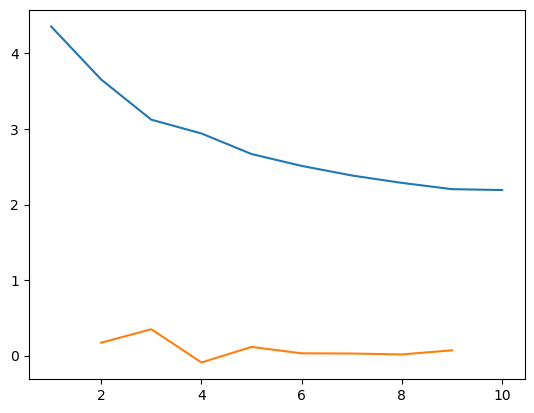

clusters_A: None
Clusters_B: None
[2 1 2 1 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 1 2] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


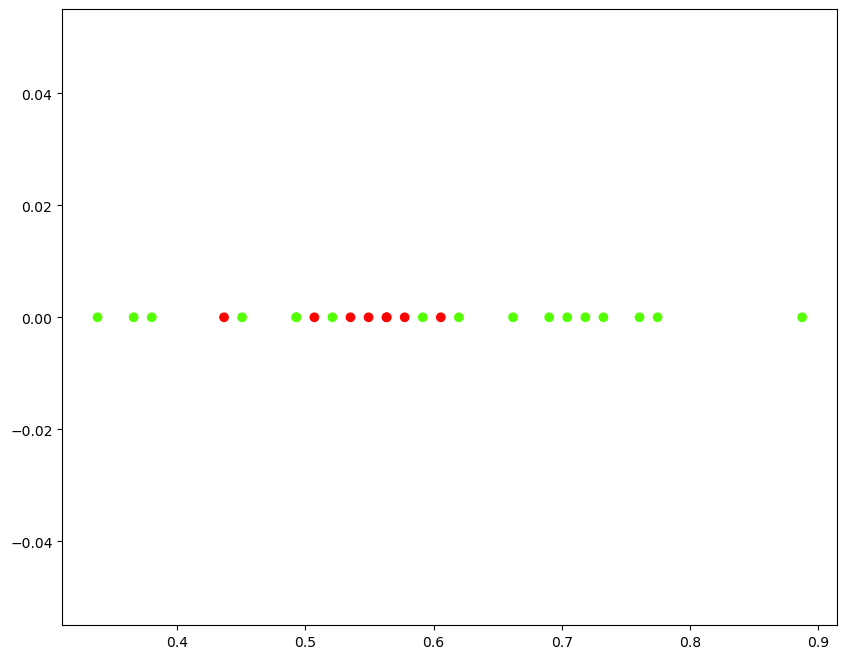

Test accuracy of TSVM_MCD: 89.4
CV accuracy of TSVM_MCD: 82.5 +/- 11.0
total run time of TSVM_MCD: 11.26 
(k, l): (2.0, 1.0)


In [4]:
print("Hepatitis with Linear Kernel")
# fetch hepatitis dataset
hepatitis = fetch_ucirepo(id=46)
# data (as pandas dataframes)
X1 = hepatitis.data.features
y1 = hepatitis.data.targets
imr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imr1 = imr.fit(X1)
X = imr1.transform(X1)
y = y1.values.ravel()
#print("class labels", np.unique(y))
A = X[np.where(y == 1)]
B = X[np.where(y == 2)]
y_A = np.ones(len(A))
y_B = -np.ones(len(B))
AB = np.vstack((A,B))
y_AB = np.hstack((y_A, y_B))
AB_train, AB_test, y_train, y_test = train_test_split(AB, y_AB, test_size = 0.3, random_state = 1000) 
#scale the dataset
stdsc = StandardScaler()
AB_train_std = stdsc.fit_transform(AB_train)
AB_test_std = stdsc.transform(AB_test)
AB_std = stdsc.fit_transform(AB)
mms = MinMaxScaler()
AB_train_mms = mms.fit_transform(AB_train)
AB_test_mms = mms.transform(AB_test)
AB_mms = mms.transform(AB)

start_time = time.time()
clf_tsvm_mcd = TSVM_MCD(c1 = 1, c2 = 1, c3 = 1, c4 = 1)
clf_tsvm_mcd.fit(AB_train_mms, y_train)
print('Test accuracy of TSVM_MCD: %.1f' % clf_tsvm_mcd.score(AB_test_mms, y_test))
###Cross validation score of TSVM_MCD
scores = cross_val_score(estimator = clf_tsvm_mcd, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
#print('CV accuracy scores of TSVM_MCD: %s' %scores)
print('CV accuracy of TSVM_MCD: %.1f +/- %.1f' % (np.mean(scores), np.std(scores)))
### Tuning hyperparameters via grid search (TSVM_MCD)
#param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#param_grid_tsvm_mcd = [{'c1': param_range, 'c3': param_range}]
#gs_tsvm_mcd = GridSearchCV(estimator = clf_tsvm_mcd, param_grid = param_grid_tsvm_mcd, scoring = 'accuracy', cv = 10, n_jobs = -1)
#gs_tsvm_mcd = gs_tsvm_mcd.fit(AB_train_mms, y_train)
#print('best score of TSVM_MCD: ', gs_tsvm_mcd.best_score_)
#print('best params of TSVM_MCD', gs_tsvm_mcd.best_params_)
#clf_tsvm_mcd = gs_tsvm_mcd.best_estimator_
#clf_tsvm_mcd.fit(AB_train_mms, y_train)
#print('Test accuracy of TSVM_MCD: %.1f' % clf_tsvm_mcd.score(AB_test_mms, y_test))
#scores = cross_val_score(estimator = clf_tsvm_mcd, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
#print('CV accuracy of TSVM_MCD: %.1f +/- %.1f' %(np.mean(scores), np.std(scores)))
end_time = time.time()
print('total run time of TSVM_MCD: %.2f ' %((end_time - start_time)))
print("(k, l): (%.1f, %.1f)" %((clf_tsvm_mcd.k, clf_tsvm_mcd.l)))